In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
# %matplotlib inline

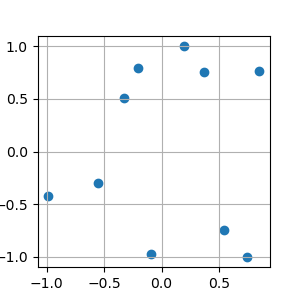

In [2]:
n = 10
X = 2*np.random.rand(n, 2)-1

plt.figure(figsize=(3,3))
plt.scatter(X[:,0], X[:,1])
plt.grid(), plt.show();

## Gaussian kernel vs. Bernoulli process

In [4]:
def gauss(sigma):
    def kernel(tau):
        return np.exp(-np.sum(tau**2, axis=-1)/sigma**2)
    return kernel

def KernelMatrix(x,y,h):
    return h(x[:,None]-y[None,:])

K = KernelMatrix(X,X,gauss(2))
print(f"first 5 cols,rows:\n{K[:5,:5]}")

first 5 cols,rows:
[[1.         0.93106092 0.94644051 0.87189791 0.87523912]
 [0.93106092 1.         0.99110792 0.96604379 0.84753535]
 [0.94644051 0.99110792 1.         0.98008469 0.90709525]
 [0.87189791 0.96604379 0.98008469 1.         0.90820469]
 [0.87523912 0.84753535 0.90709525 0.90820469 1.        ]]


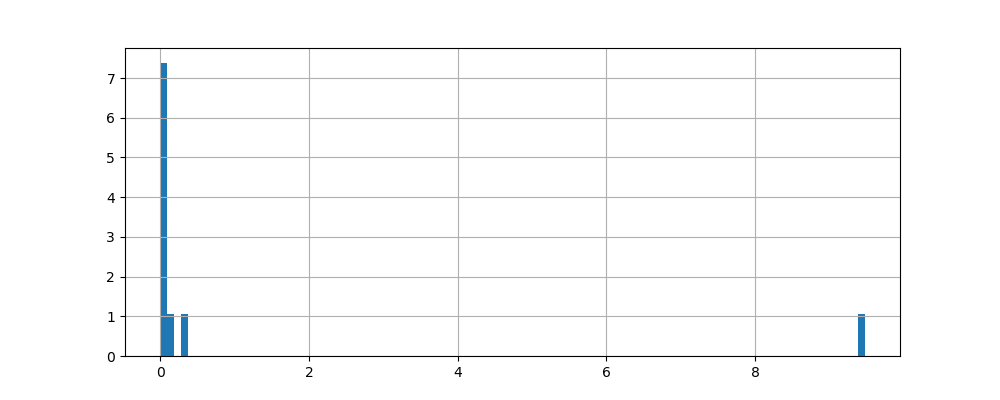

In [5]:
w, v = np.linalg.eigh(K)
    
plt.figure(figsize=(10,4))
plt.hist(w,100, density=True)
plt.grid();

(100, 100)


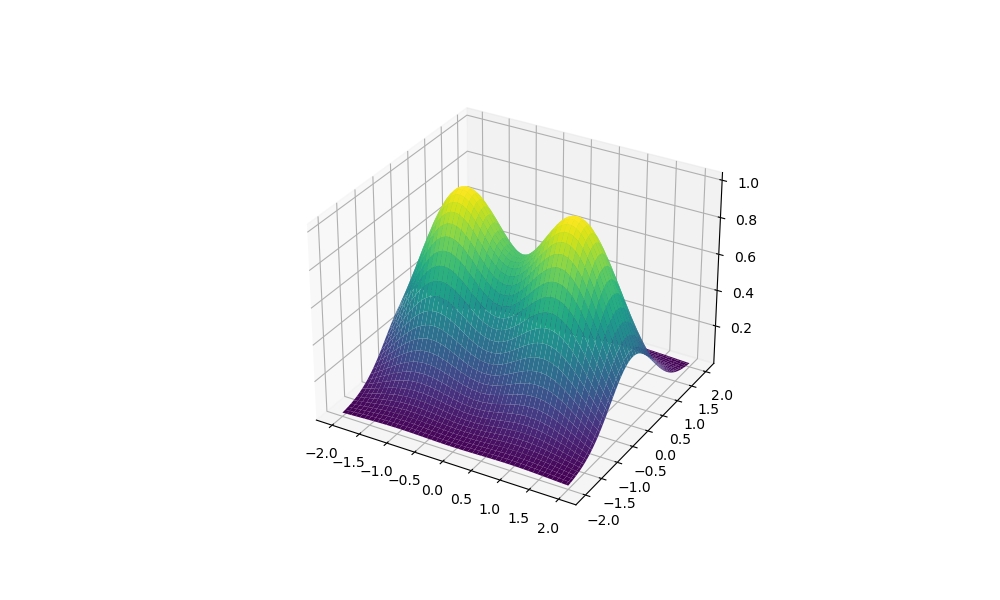

In [13]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')

nb_discr = 100
x, y = np.linspace(-2, 2, nb_discr), np.linspace(-2, 2, nb_discr)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx, yy]).transpose(1,2,0)

mu_1 = [-1,0]
mu_2 = [1,0]
C = 0.5
zz = np.exp( -np.sum((xy - mu_1)**2, axis=-1)/(2*C)) + np.exp( -np.sum((xy - mu_2)**2, axis=-1)/(2*C))
print(zz.shape)

surf = ax.plot_surface(xx, yy, zz, cmap="viridis")
plt.show()

## OPE kernel

In [3]:
import scipy.stats as stats
gamma_tilde = stats.gaussian_kde(X.T)
gamma_tilde_X = gamma_tilde.pdf(X.T)

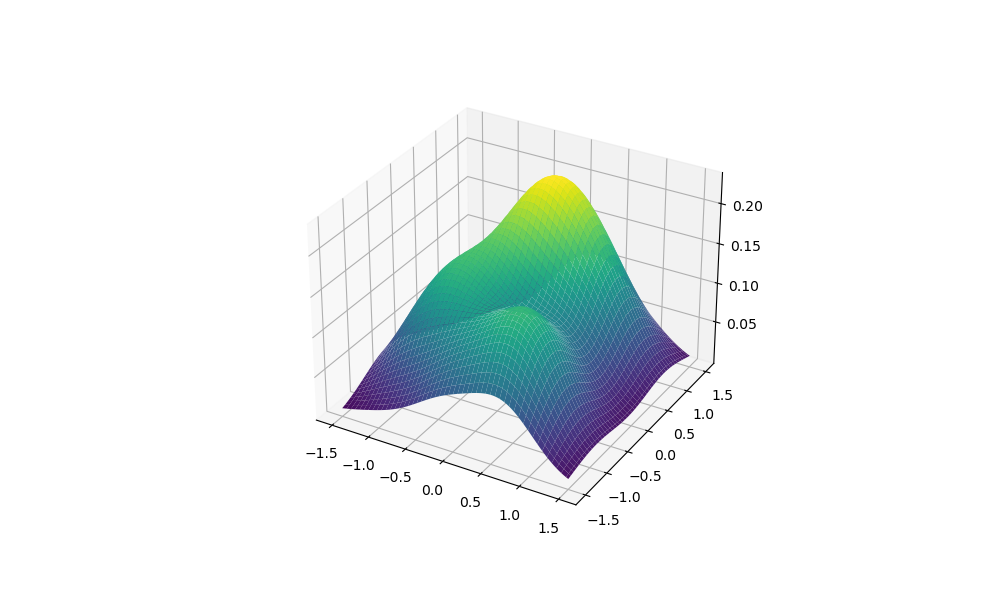

In [4]:
plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
nb_discr = 100
cube_limit = 1.5
x, y = np.linspace(-cube_limit, cube_limit, nb_discr), np.linspace(-cube_limit, cube_limit, nb_discr)
xx, yy = np.meshgrid(x, y)
xy = np.array([xx, yy]).transpose(1,2,0)
zz =  gamma_tilde.pdf(xy.reshape(-1,2).T).T
surf = ax.plot_surface(xx, yy, zz.reshape(100,100), cmap="viridis")
plt.show()

In [5]:
from dppy.multivariate_jacobi_ope import MultivariateJacobiOPE
from scipy.sparse.linalg.eigen.arpack import eigsh
# Function for generating the DPP kernel for first way of gradient estimation

m = 5
dpp = MultivariateJacobiOPE(m, np.array([[.5,.5], [.5,.5]]))
def generate_DPP_kernel(X,n,m,dpp,gamma_tilde_X):
    Kq = dpp.K(X, eval_pointwise=False)
    qX = dpp.eval_w(X)
    D = np.diag(np.sqrt(qX / gamma_tilde_X))
    K_tilde = D @ Kq @ D
    evals_large_sparse, evecs_large_sparse = eigsh(K_tilde, m, which='LM')
    evals_large_sparse = np.ones(m)
    K_tilde = np.dot(evecs_large_sparse,evecs_large_sparse.T)
    diagK_tilde = np.diag(K_tilde)
    print(Kq.shape, K_tilde.shape, diagK_tilde)
    return evals_large_sparse, evecs_large_sparse, diagK_tilde

evals_large_sparse, evecs_large_sparse, diagK_tilde = generate_DPP_kernel(X,n,m,dpp,gamma_tilde_X)

(10, 10) (10, 10) [0.33376382 0.50354449 0.29567452 0.56298181 0.13634116 0.79957785
 0.1815704  0.75700948 0.75553601 0.67400046]


In [ ]:
eig_vals, eig_vecs, diagK_tilde = generate_DPP_kernel(Z,N,p4,dpp,gammatildeZ)
ops2.kernel_diag = diagK_tilde
ops2.DPP_list = generate_DPP_list_of_samples(eig_vals, eig_vecs, maxit4)

theta4, loss_total4, grad_total4, error4 = MiniBatchSGD(X, y, theta0, loss_type=losstype, elambda=lambda_input,
                     batch_size=p4, maxiter=maxit4, sampleops=ops2, thetastar=theta_direct)